# Estudo de Resenhas

### Um Estudo Sobre Sentimentos em Análises de Filmes

Será que é possível analisar sentimentos em texto? Posso te dizer que sim! Como? Através de uma rede neural. Pra treinar uma rede neural é necesário que se tenha dados. Então, em vez de baixar um conjunto de dados externo, eu usarei o conjunto de dados de <a href="https://keras.io/api/datasets/">classificação de sentimento de revisões de filmes do catálogo IMDB</a> o qual está no <b>Keras</b>. 

O IMDB é conhecido site que age como um catálogo internacional de filmes, séries e outros formatos. O seu intuito é permitir o acesso irrestrito para qualquer um votar e obter informações sobre algum programa desejado. 
O conjunto de dados do Catálogo IMDB contém <i>50 mil revisões cinematográficas</i> que foram classificas individualmente como positivas (1) ou negativas (0). Essas 50 mil revisões foram divididas em 25 mil para treinamento e 25 mil para teste. 
O sentimento que é expresso nessas revisões é a base para qual rede neural irá análisar o texto apresentado e irá fazer atribuição a esse texto com uma pontuação referente ao sentimento.


In [104]:
# Carregando os dados
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

Além de carregar os dados esse código cria um dicionário que mapeia as palavras transformando-as em inteiros que indicam a frequência relativa com que aparecem. Sendo assim, um inteiro exclusivo é atribuído a cada palavra. O número 1 é atribuído à palavra mais comum, o número 2 é atribuído à segunda palavra mais comum e assim por diante.

<i>load_data</i> também retorna um par de tuplas que contém as revisões de filme (<i>x_train</i> e <i>x_test</i>) e os 1s e 0s classificando-as como positivas e negativas (<i>y_train</i> e <i>y_test</i>).

<br/>
## Redes Neurais

Redes neurais são sistemas de computação com nós interconectados que funcionam como os neurônios do cérebro humano.<br/>
Usando algoritmos, elas podem reconhecer padrões escondidos e correlações em <i>dados</i> brutos, agrupá-los e classificá-los, e – com o tempo – aprender e melhorar continuamente.

* **Como funciona?**
Uma rede neural simples inclui uma camada de entrada, outra de saída (ou alvo) e, entre elas, uma camada oculta. As camadas são conectadas através de nós e essas conexões formam uma "rede" – a rede neural – de nós interconectados.


Resumidamente, uma rede neural não é treinada com texto e sim com números. Especificamente, elas são treinadas com <b>tensores</b> (observe que no 1º código aparece a mensagem "Usando back-end de TensorFlow"). Os tensores são ferramentas totalmente matemáticas, mas no caso desse artigo é o seguinte: cada revisão é um tensor unidimensional (imagine uma matriz unidimensional) que contém inteiros identificando as palavras contidas na revisão.

Vou dar um exemplo na célula seguinte e você verá os inteiros que representam a primeira revisão no conjunto de treinamento:


In [105]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

<i>Conjunto de inteiros que compõem a primeira revisão no conjunto de treinamento do Catálogo IMDB.<br/>
O primeiro número na lista (1) não representa nenhuma palavra. Ele marca o início da revisão e é o mesmo cada revisão no conjunto. 
Os números 0 e 2 também são reservados, sendo assim existe 3 números reservados, então eu subtraio 3 dos outros números para mapear um número inteiro em uma revisão para o inteiro correspondente no dicionário. O segundo número, 14, faz referência à palavra que corresponde ao número 11 no dicionário, o terceiro número representa a pavra à qual o número 19 é atribuído no dicionário e assim por diante.</i>


### Curioso para ver a aparência do dicionário? 
A seguir será executada uma instrução e só será mostrado apenas um subconjunto das entradas do dicionário, mas no geral contém mais de 88 mil palavras e os inteiros correspondem a elas. 

In [106]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

<i>Dicionário mapeando palavras para inteiros.</i>

* Agora iremos fazer o reverso para que possamos ver o <b>texto original</b>.


A tradução, levando em consideração que os caracteres de pontuação foram removidos:<br/><br/>
<i>"Esse filme foi simplesmente um cenário brilhante para o elenco, a direção da história, todo mundo realmente se encaixa no papel que eles representavam e você pode imaginar estar lá, robert? é um ator incrível e agora é o mesmo diretor? pai veio da mesma ilha escocesa que eu, então eu amei o fato de haver uma conexão real com este filme. As observações espirituosas ao longo do filme foram ótimas, foi tão brilhante que comprei o filme assim que foi lançado? e recomendaria a todos que assistissem e a pesca com mosca foi realmente incrível no final, foi tão triste e você sabe o que dizem se você chorar em um filme, deve ter sido bom e isso definitivamente também foi? para os dois garotinhos que jogaram? de norman e paul eles eram apenas crianças brilhantes são muitas vezes deixados de fora? Eu acho que porque as estrelas que as interpretam crescidas são um perfil tão grande para todo o filme, mas essas crianças são incríveis e devem ser elogiadas pelo que fizeram, você não acha que a história toda foi tão adorável porque era verdade? e era a vida de alguém depois de tudo o que foi compartilhado com todos nós."</i>

In [107]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # preenchimento
word_dict['>'] = 1 # início
word_dict['?'] = 2 # palavra desconhecida
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

<i>A primeira revisão em formato textual.</i>

<br/>A seguir irei codificar uma função que usa lista de listas como entrada e converte as listas internas para um comprimento específico, truncando-as se necessário ou preenchendo-as com 0s. A execução irá forçar todas as listras que repreentam as resenhas de <i>x_train</i> e <i>x_test</i> para um comprimento de 500 inteiros.

In [108]:
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

<br/> 
### Depois de preparar os dados de treinamento é hora de criar o modelo!
Apos a execução do código será criada uma rede neural para análise de sentimento:


In [109]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_7 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                256016    
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


<i>Criando uma rede neural com o Keras</i>

* **Embedding**: camada de incorporação, mapeia matrizes multidimensionais que contém índices de palavra números inteiros em matrizes de <i>ponto flutuante</i> que contém <b>menos</b> dimensões; ela também permite que palavras com significados semelhantes sejam tratadas de modo parecido.
* **Flatten**: essa chamada após o <i>embedding</i> redimensiona a saída para a entrada da próxima camada.
* **Dense**: as próximas três camadas adicionadas ao modelo são camadas densas, também conhecidas como camadas <i>totalmente conectadas</i>. Essas camadas que permitem a uma rede neural "aprender" com os dados de entrada adivinhando iterativamente a saída, verificando os resultados e ajustando as conexões para produzir melhores resultados. <br/>As duas primeiras camadas densas contém 16 neurônios. Esse número foi escolhido arbitrariamente; a camada densa final contém apenas um neurônio porque a meta final da rede é prever uma saída, ou seja, uma pontuação de sentimento de 0,0 a 0,1.



### Treinando a Rede Neural


O <i>epoche</i> informa ao Keras para dar 5 passos para frente e para trás no modelo. A cada passagem o modelo aprende com os dados de treinamento e valida quão bem ele aprendeu usando os dados de teste. Em seguida, ele faz ajustes e volta para a próxima passagem. 

Isso é refletido na saída da função <i>fit</i>, que mostra a precisão de treinamento (<i>acc</i>) e a precisão de validação (<i>val_acc</i>) de cada época.

São usados 128 exemplos simultaneamente para treinar a rede. Tamanhos de lotes maiores aceleram o aprendizado (menos passagens são necessárias em cada época), mas lotes menores, às vezes, aumentam a precisão.

In [110]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 12s 483us/step - loss: 0.5235 - accuracy: 0.7141 - val_loss: 0.3162 - val_accuracy: 0.8618
Epoch 2/5
25000/25000 [==============================] - 12s 463us/step - loss: 0.2122 - accuracy: 0.9186 - val_loss: 0.2795 - val_accuracy: 0.8824
Epoch 3/5
25000/25000 [==============================] - 12s 476us/step - loss: 0.1062 - accuracy: 0.9665 - val_loss: 0.3178 - val_accuracy: 0.8768
Epoch 4/5
25000/25000 [==============================] - 12s 472us/step - loss: 0.0406 - accuracy: 0.9913 - val_loss: 0.3624 - val_accuracy: 0.8739
Epoch 5/5
25000/25000 [==============================] - 13s 540us/step - loss: 0.0141 - accuracy: 0.9983 - val_loss: 0.4056 - val_accuracy: 0.8740


<i>Treinamento do modelo.</i>

O gráfio a seguir é uma comparação entre a precisão de treinamento e de validação conforme o treino prossegue:

[]

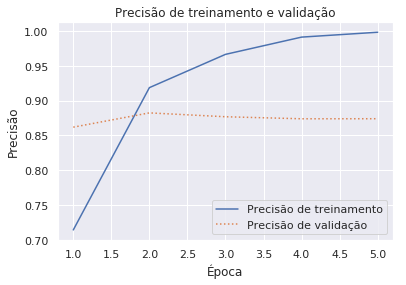

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Precisão de treinamento')
plt.plot(epochs, val, ':', label='Precisão de validação')
plt.title('Precisão de treinamento e validação')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.legend(loc='lower right')
plt.plot()

<i>Perda de treinamento e de validação.</i>

* A seguir será executado um modelo para determinar com que <b>exatidão</b> o modelo é capaz de quantificar o sentimento expresso em texto com base nos dados de teste:

In [112]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.40%


<i>86% é uma precisão aceitável, considerando que criamos o modelo do zero (em vez de usar uma rede neural pré-treinada) e que o tempo de treinamento foi curto.</i>

### Exemplos Práticos
O teste é feito quando eu escrevo uma resenha, em inglês, no modelo e eu vejo o quão capaz ele é de quantificar o sentimento expresso no texto. 
Por mais que eu não tenha conseguido chegar a 100% de precisão, esse modelo é capaz de analisar uma imensa quantidade de sentimentos em uma simples resenha cinematográfica. 

<i>Como acontece essa análise?</i>
A seguir tem uma função de Python que aceita uma cadeia de caracteres de texto como <b>entrada</b>, passa-a para o modelo e retorna uma pontuação, de 0 a 1, quantificando o sentimento expresso.
Quanto maior o número, mais positivo o sentimento.

In [116]:
import string
import numpy as np

def analyze(text):
   
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [117]:
# tradução: as longas filas e o mau atendimento ao cliente realmente me impediram.
analyze('The long lines and poor customer service really turned me off.')

0.15859762

In [118]:
#tradução: O filme mais emocionante que eu já vi.
analyze('The most exciting film I have ever seen.')

0.9188538

In [119]:
# tradução: este filme é totalmente sem noção.
analyze('This film is totally clueless.')

0.59756154

In [120]:
# tradução: coringa é perturbador. Comovente. Fantástico. O melhor trabalho de Joaquin Phoenix. Não é sorumbático somente, mas é um prêmio para nós espectadores.
analyze('Joker is disturbing. Heart touching. Fantastic. Joaquin Phoenixs best work. It is not only sad, but it is a prize for us spectators.')

0.9758488

O último exemplo apesar de mais complexo conseguiu tirar a essência do comentário e transformá-lo em quase 1, que é o máximo.